In [6]:
'''
RL to capture a hidden flag
'''
import numpy as np
import matplotlib.pyplot as plt

In [14]:
# Grid environment 
COL = 10 ## 6 10 12. 15 fail
ROW = 10 ## 4 10 12. 15 fail

NUM_STATES = COL * ROW
NUM_ACTIONS = 4 # up down left right

FLAG_STATE = 13 # preset flag location. Must be less than COL * ROW

REWARD_FAIL = -10
REWARD_SUCCCESS = 100

## convert state to row and column
def getStateToRC(state):
    r = state // COL ## col
    c = state % COL
    return r, c

## get state from row and column
def getRCToState(r, c):
    return int(r*COL + c)

## step function
def xp_step(state, action):
    r, c = getStateToRC(state)
    
    if (r > 0 and action == 0): ## 4 actions: up down left right
        r-=1
    if (r < ROW-1 and action == 1):
        r+=1
    if (c > 1 and action == 2):
        c-=1
    if (c < COL-1 and action == 3):
        c+=1

    state_new = getRCToState(r, c)
    done = False
    
    reward = REWARD_FAIL
    
    if (state_new == FLAG_STATE):  ## fixed place
        done = True
        reward = REWARD_SUCCCESS
        
    return state_new, reward, done


env = []


# Define Q-learning function
def QLearning(env, learning, discount, epsilon, min_eps, episodes):
    # Determine size of discretized state space
    
    # Initialize Q table
    Q = np.random.uniform(low = -1, high = 1, 
                          size = (NUM_STATES, NUM_ACTIONS)) 
    
    # Initialize variables to track rewards
    reward_list = []
    avg_reward_list = []
    
    # Calculate episodic decay in epsilon
    decay = (epsilon - min_eps)/episodes
    
    # Run Q learning algorithm
    for i in range(episodes):
        # Initialize parameters
        done = False
        total_reward, reward = 0, 0
        state = np.random.randint(0, NUM_STATES -1) # random
    
        while done != True:                  
            # Determine the next action - epsilon greedy strategy
            if np.random.random() < 1 - epsilon:
                action = np.argmax(Q[state]) 
            else:
                action = np.random.randint(0, NUM_ACTIONS -1) 
                
            # Get next state and reward
            state_new, reward, done = xp_step(state, action) 
 
            #Allow for terminal states
            if done:
                Q[state, action] = reward
                
            # Adjust Q value for current state
            else:
                delta = learning * (reward + discount * np.max(Q[state_new]) - Q[state, action])
                Q[state, action] += delta
                                     
            # Update variables
            total_reward += reward
            state = state_new
        
        # Decay epsilon
        if epsilon > min_eps:
            epsilon -= decay
        
        # Track rewards
        reward_list.append(total_reward)
        
        if (i+1) % 100 == 0: # sample rewards
            avg_reward = np.mean(reward_list)
            avg_reward_list.append(avg_reward)
            reward_list = []
            
        if (i+1) % 100 == 0:    
            print('Episode {} Average Reward: {}'.format(i+1, avg_reward))
            
    # env.close()
    
    return avg_reward_list, Q



In [15]:
# Run Q-learning algorithm
rewards, Q = QLearning(env, 0.2, 0.9, 0.8, 0, 10000)

Episode 100 Average Reward: -1233.8
Episode 200 Average Reward: -990.5
Episode 300 Average Reward: -704.1
Episode 400 Average Reward: -683.4
Episode 500 Average Reward: -768.3
Episode 600 Average Reward: -484.3
Episode 700 Average Reward: -657.7
Episode 800 Average Reward: -617.3
Episode 900 Average Reward: -468.7
Episode 1000 Average Reward: -417.3
Episode 1100 Average Reward: -476.0
Episode 1200 Average Reward: -407.0
Episode 1300 Average Reward: -289.7
Episode 1400 Average Reward: -404.1
Episode 1500 Average Reward: -336.9
Episode 1600 Average Reward: -165.9
Episode 1700 Average Reward: -232.9
Episode 1800 Average Reward: -219.2
Episode 1900 Average Reward: -217.8
Episode 2000 Average Reward: -206.1
Episode 2100 Average Reward: -216.0
Episode 2200 Average Reward: -172.7
Episode 2300 Average Reward: -135.9
Episode 2400 Average Reward: -182.9
Episode 2500 Average Reward: -106.3
Episode 2600 Average Reward: -129.7
Episode 2700 Average Reward: -108.7
Episode 2800 Average Reward: -105.4


Text(0.5, 1.0, 'Average Reward vs Episodes')

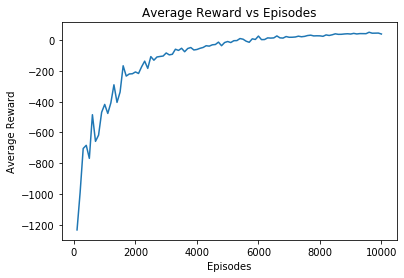

In [16]:
# Plot Rewards
plt.plot(100*(np.arange(len(rewards)) + 1), rewards)
plt.xlabel('Episodes')
plt.ylabel('Average Reward')
plt.title('Average Reward vs Episodes')
# plt.savefig('rewards.jpg')     
# plt.close()  

In [13]:
print (Q)

[[  6.28623671  -4.34156305   6.27389835  18.098     ]
 [ 18.098       31.22        18.098        4.51892508]
 [ 31.22        45.8         18.098       36.36750366]
 [ 45.8         62.          31.22        -2.60547942]
 [ 62.          80.          45.8         -2.19799919]
 [ 79.98292357 100.          61.99577394  -0.8021063 ]
 [ 61.99993754  80.          79.99996815  -0.82436729]
 [ 45.50578999  61.20286367  62.           0.65293065]
 [  6.27560625   6.2882      -4.34240823  -4.86358241]
 [ 18.098       18.098       31.22        45.8       ]
 [ 31.22        31.22        31.22        62.        ]
 [ 45.8         45.8         45.8         80.        ]
 [ 62.          62.          62.         100.        ]
 [ 79.25747215  77.19944804  79.99999999   0.83970344]
 [ 61.99999435  61.9999991  100.           0.12737155]
 [ 45.1866961   45.77303303  80.          -1.70888828]
 [ -4.34073081  -4.34063986   6.28780669  18.098     ]
 [ 31.22         6.2882      18.098      -13.36055561]
 [ 45.8   